C:\Users\shari\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


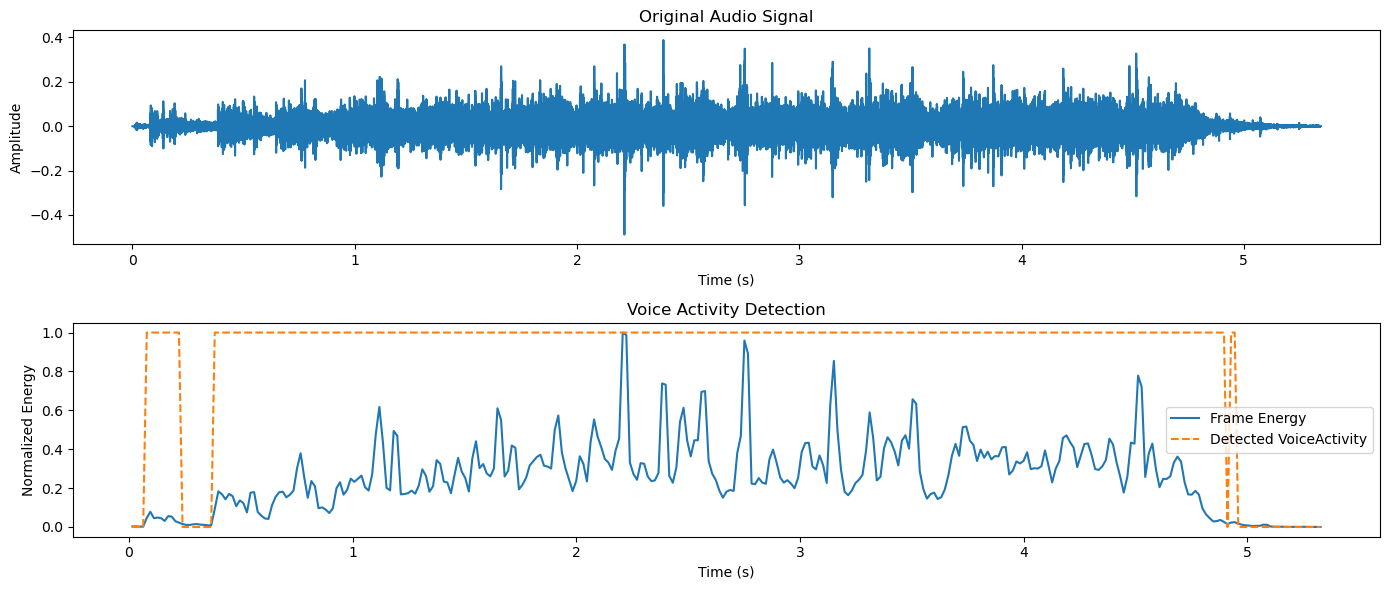

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
audio_path = r"C:\Users\shari\Downloads\Applause, short (5 sec).wav"
frame_length=1024
hop_length=512
energy_threshold=0.02

audio, sr = librosa.load(audio_path, sr=None)
frames = librosa.util.frame(audio, frame_length=frame_length,
hop_length=hop_length)
frame_energy = np.sum(frames**2, axis=0) / frame_length
frame_energy = frame_energy / np.max(frame_energy)
voice_activity = frame_energy > energy_threshold
time = np.arange(len(audio)) / sr
frame_time = librosa.frames_to_time(np.arange(len(frame_energy)), sr=sr,
hop_length=hop_length, n_fft=frame_length)
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(time, audio, label="Audio Signal")
plt.title('Original Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(frame_time, frame_energy, label="Frame Energy")
plt.plot(frame_time, voice_activity * np.max(frame_energy), label="Detected VoiceActivity", linestyle='--')
plt.title('Voice Activity Detection')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Energy')
plt.legend()
plt.tight_layout()
plt.show()